In [2]:
%matplotlib inline


# Annotating Plots


The following examples show how it is possible to annotate plots in matplotlib.
This includes highlighting specific points of interest and using various
visual tools to call attention to this point. For a more complete and in-depth
description of the annotation and text tools in :mod:`matplotlib`, see the
:doc:`tutorial on annotation </tutorials/text/annotations>`.



In [3]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import numpy as np
from matplotlib.text import OffsetFrom

Specifying text points and annotation points
--------------------------------------------

You must specify an annotation point `xy=(x,y)` to annotate this point.
additionally, you may specify a text point `xytext=(x,y)` for the
location of the text for this annotation.  Optionally, you can
specify the coordinate system of `xy` and `xytext` with one of the
following strings for `xycoords` and `textcoords` (default is 'data')::

  'figure points'   : points from the lower left corner of the figure
  'figure pixels'   : pixels from the lower left corner of the figure
  'figure fraction' : 0,0 is lower left of figure and 1,1 is upper, right
  'axes points'     : points from lower left corner of axes
  'axes pixels'     : pixels from lower left corner of axes
  'axes fraction'   : 0,0 is lower left of axes and 1,1 is upper right
  'offset points'   : Specify an offset (in points) from the xy value
  'offset pixels'   : Specify an offset (in pixels) from the xy value
  'data'            : use the axes data coordinate system

Note: for physical coordinate systems (points or pixels) the origin is the
(bottom, left) of the figure or axes.

Optionally, you can specify arrow properties which draws and arrow
from the text to the annotated point by giving a dictionary of arrow
properties

Valid keys are::

  width : the width of the arrow in points
  frac  : the fraction of the arrow length occupied by the head
  headwidth : the width of the base of the arrow head in points
  shrink : move the tip and base some percent away from the
           annotated point and text
  any key for matplotlib.patches.polygon  (e.g., facecolor)



[(-3.0, 5.0), (-1.0, 5.0)]

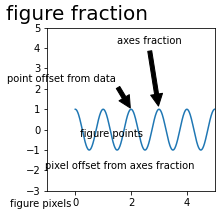

In [4]:
# Create our figure and data we'll use for plotting
fig, ax = plt.subplots(figsize=(3, 3))

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)

# Plot a line and add some simple annotations
line, = ax.plot(t, s)
ax.annotate('figure pixels',
            xy=(10, 10), xycoords='figure pixels')
ax.annotate('figure points',
            xy=(80, 80), xycoords='figure points')
ax.annotate('figure fraction',
            xy=(.025, .975), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=20)

# The following examples show off how these arrows are drawn.

ax.annotate('point offset from data',
            xy=(2, 1), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='bottom')

ax.annotate('axes fraction',
            xy=(3, 1), xycoords='data',
            xytext=(0.8, 0.95), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')

# You may also use negative points or pixels to specify from (right, top).
# E.g., (-10, 10) is 10 points to the left of the right side of the axes and 10
# points above the bottom

ax.annotate('pixel offset from axes fraction',
            xy=(1, 0), xycoords='axes fraction',
            xytext=(-20, 20), textcoords='offset pixels',
            horizontalalignment='right',
            verticalalignment='bottom')

ax.set(xlim=(-1, 5), ylim=(-3, 5))

Using multiple coordinate systems and axis types
------------------------------------------------

You can specify the xypoint and the xytext in different positions and
coordinate systems, and optionally turn on a connecting line and mark
the point with a marker.  Annotations work on polar axes too.

In the example below, the xy point is in native coordinates (xycoords
defaults to 'data').  For a polar axes, this is in (theta, radius) space.
The text in the example is placed in the fractional figure coordinate system.
Text keyword args like horizontal and vertical alignment are respected.



[(-20.0, 20.0), (-20.0, 20.0)]

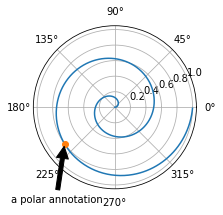

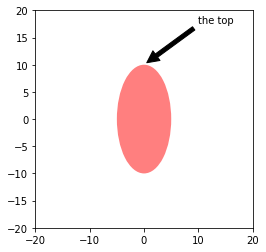

In [5]:
fig, ax = plt.subplots(subplot_kw=dict(projection='polar'), figsize=(3, 3))
r = np.arange(0, 1, 0.001)
theta = 2*2*np.pi*r
line, = ax.plot(theta, r)

ind = 800
thisr, thistheta = r[ind], theta[ind]
ax.plot([thistheta], [thisr], 'o')
ax.annotate('a polar annotation',
            xy=(thistheta, thisr),  # theta, radius
            xytext=(0.05, 0.05),    # fraction, fraction
            textcoords='figure fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left',
            verticalalignment='bottom')

# You can also use polar notation on a cartesian axes.  Here the native
# coordinate system ('data') is cartesian, so you need to specify the
# xycoords and textcoords as 'polar' if you want to use (theta, radius).

el = Ellipse((0, 0), 10, 20, facecolor='r', alpha=0.5)

fig, ax = plt.subplots(subplot_kw=dict(aspect='equal'))
ax.add_artist(el)
el.set_clip_box(ax.bbox)
ax.annotate('the top',
            xy=(np.pi/2., 10.),      # theta, radius
            xytext=(np.pi/3, 20.),   # theta, radius
            xycoords='polar',
            textcoords='polar',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left',
            verticalalignment='bottom',
            clip_on=True)  # clip to the axes bounding box

ax.set(xlim=[-20, 20], ylim=[-20, 20])

Customizing arrow and bubble styles
-----------------------------------

The arrow between xytext and the annotation point, as well as the bubble
that covers the annotation text, are highly customizable. Below are a few
parameter options as well as their resulting output.



In [17]:
fig, ax = plt.subplots(figsize=(8, 5))

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = ax.plot(t, s, lw=3)

ax.annotate('THIS HERE !!!!!!!!',
            xy=(0, 1), xycoords='data',
            xytext=(-50, 30), textcoords='offset points',
            arrowprops=dict(arrowstyle="->"))


ax.annotate('angle,\nshrink',
            xy=(4., 1), xycoords='data',
            xytext=(-60, 30), textcoords='offset points',
            bbox=dict(boxstyle="round", fc="0.999"),
            arrowprops=dict(arrowstyle="->",
                            shrinkA=0, shrinkB=10,
                            connectionstyle="angle,angleA=0,angleB=90,rad=10"))

# You can pass an empty string to get only annotation arrows rendered
ann = ax.annotate('', xy=(4., 1.), xycoords='data',
                  xytext=(4.5, -1), textcoords='data',
                  arrowprops=dict(arrowstyle="<->",
                                  connectionstyle="bar",
                                  ec="k",
                                  shrinkA=5, shrinkB=5))

ax.set(xlim=(-1, 5), ylim=(-4, 3))



[(-4.0, 3.0), (-1.0, 5.0)]

ValueError: 4 is not a recognized coordinate

<Figure size 576x360 with 1 Axes>

[(-5.0, 3.0), (-1.0, 5.0)]

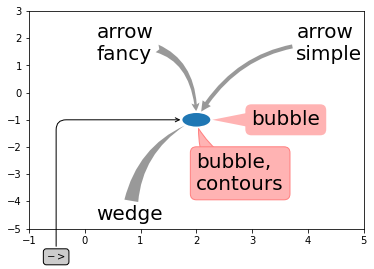

In [10]:
# We'll create another figure so that it doesn't get too cluttered
fig, ax = plt.subplots()

el = Ellipse((2, -1), 0.5, 0.5)
ax.add_patch(el)

ax.annotate('$->$',
            xy=(2., -1), xycoords='data',
            xytext=(-150, -140), textcoords='offset points',
            bbox=dict(boxstyle="round", fc="0.8"),
            arrowprops=dict(arrowstyle="->",
                            patchB=el,
                            connectionstyle="angle,angleA=90,angleB=0,rad=10"))

ax.annotate('arrow\nfancy',
            xy=(2., -1), xycoords='data',
            xytext=(-100, 60), textcoords='offset points',
            size=20,
            # bbox=dict(boxstyle="round", fc="0.8"),
            arrowprops=dict(arrowstyle="fancy",
                            fc="0.6", ec="none",
                            patchB=el,
                            connectionstyle="angle3,angleA=0,angleB=-90"))

ax.annotate('arrow\nsimple',
            xy=(2., -1), xycoords='data',
            xytext=(100, 60), textcoords='offset points',
            size=20,
            # bbox=dict(boxstyle="round", fc="0.8"),
            arrowprops=dict(arrowstyle="simple",
                            fc="0.6", ec="none",
                            patchB=el,
                            connectionstyle="arc3,rad=0.3"))

ax.annotate('wedge',
            xy=(2., -1), xycoords='data',
            xytext=(-100, -100), textcoords='offset points',
            size=20,
            # bbox=dict(boxstyle="round", fc="0.8"),
            arrowprops=dict(arrowstyle="wedge,tail_width=0.7",
                            fc="0.6", ec="none",
                            patchB=el,
                            connectionstyle="arc3,rad=-0.3"))

ann = ax.annotate('bubble,\ncontours',
                  xy=(2., -1), xycoords='data',
                  xytext=(0, -70), textcoords='offset points',
                  size=20,
                  bbox=dict(boxstyle="round",
                            fc=(1.0, 0.7, 0.7),
                            ec=(1., .5, .5)),
                  arrowprops=dict(arrowstyle="wedge,tail_width=1.",
                                  fc=(1.0, 0.7, 0.7), ec=(1., .5, .5),
                                  patchA=None,
                                  patchB=el,
                                  relpos=(0.2, 0.8),
                                  connectionstyle="arc3,rad=-0.1"))

ann = ax.annotate('bubble',
                  xy=(2., -1), xycoords='data',
                  xytext=(55, 0), textcoords='offset points',
                  size=20, va="center",
                  bbox=dict(boxstyle="round", fc=(1.0, 0.7, 0.7), ec="none"),
                  arrowprops=dict(arrowstyle="wedge,tail_width=1.",
                                  fc=(1.0, 0.7, 0.7), ec="none",
                                  patchA=None,
                                  patchB=el,
                                  relpos=(0.2, 0.5)))

ax.set(xlim=(-1, 5), ylim=(-5, 3))

More examples of coordinate systems
-----------------------------------

Below we'll show a few more examples of coordinate systems and how the
location of annotations may be specified.



In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)

bbox_args = dict(boxstyle="round", fc="0.8")
arrow_args = dict(arrowstyle="->")

# Here we'll demonstrate the extents of the coordinate system and how
# we place annotating text.

ax1.annotate('figure fraction : 0, 0', xy=(0, 0), xycoords='figure fraction',
             xytext=(20, 20), textcoords='offset points',
             ha="left", va="bottom",
             bbox=bbox_args,
             arrowprops=arrow_args)

ax1.annotate('figure fraction : 1, 1', xy=(1, 1), xycoords='figure fraction',
             xytext=(-20, -20), textcoords='offset points',
             ha="right", va="top",
             bbox=bbox_args,
             arrowprops=arrow_args)

ax1.annotate('axes fraction : 0, 0', xy=(0, 0), xycoords='axes fraction',
             xytext=(20, 20), textcoords='offset points',
             ha="left", va="bottom",
             bbox=bbox_args,
             arrowprops=arrow_args)

ax1.annotate('axes fraction : 1, 1', xy=(1, 1), xycoords='axes fraction',
             xytext=(-20, -20), textcoords='offset points',
             ha="right", va="top",
             bbox=bbox_args,
             arrowprops=arrow_args)

# It is also possible to generate draggable annotations

an1 = ax1.annotate('Drag me 1', xy=(.5, .7), xycoords='data',
                   #xytext=(.5, .7), textcoords='data',
                   ha="center", va="center",
                   bbox=bbox_args,
                   #arrowprops=arrow_args
                   )

an2 = ax1.annotate('Drag me 2', xy=(.5, .5), xycoords=an1,
                   xytext=(.5, .3), textcoords='axes fraction',
                   ha="center", va="center",
                   bbox=bbox_args,
                   arrowprops=dict(patchB=an1.get_bbox_patch(),
                                   connectionstyle="arc3,rad=0.2",
                                   **arrow_args))
an1.draggable()
an2.draggable()

an3 = ax1.annotate('', xy=(.5, .5), xycoords=an2,
                   xytext=(.5, .5), textcoords=an1,
                   ha="center", va="center",
                   bbox=bbox_args,
                   arrowprops=dict(patchA=an1.get_bbox_patch(),
                                   patchB=an2.get_bbox_patch(),
                                   connectionstyle="arc3,rad=0.2",
                                   **arrow_args))

# Finally we'll show off some more complex annotation and placement

text = ax2.annotate('xy=(0, 1)\nxycoords=("data", "axes fraction")',
                    xy=(0, 1), xycoords=("data", 'axes fraction'),
                    xytext=(0, -20), textcoords='offset points',
                    ha="center", va="top",
                    bbox=bbox_args,
                    arrowprops=arrow_args)

ax2.annotate('xy=(0.5, 0)\nxycoords=artist',
             xy=(0.5, 0.), xycoords=text,
             xytext=(0, -20), textcoords='offset points',
             ha="center", va="top",
             bbox=bbox_args,
             arrowprops=arrow_args)

ax2.annotate('xy=(0.8, 0.5)\nxycoords=ax1.transData',
             xy=(0.8, 0.5), xycoords=ax1.transData,
             xytext=(10, 10),
             textcoords=OffsetFrom(ax2.bbox, (0, 0), "points"),
             ha="left", va="bottom",
             bbox=bbox_args,
             arrowprops=arrow_args)

ax2.set(xlim=[-2, 2], ylim=[-2, 2])
plt.show()